<a href="https://colab.research.google.com/github/Varun0801/Deep_Learning_Essentials/blob/master/Image_Processing_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""Digital Image

(Grayscale) It is a representation of a two dimensional image as a finite set of digital values, called picture elements or pixels

italicized textPixel

These are the elements of a digital image and they typically represent gray levels, colours, heights, opacities etc

A digital image can be written as a function

f(x, y) = i(x,y) r(x,y)*

f(x, y): Intensity at given point (x, y)

i(x, y): Illumination at (x, y)

r(x, y): Reflectance/ Transmissivity at (x, y)

As we deal with vectors it is good to represent the data in the form of matrices.

Digitization implies that a digital image is an approximation of a real scene.

Digital Image Processing

It is processing/ performing multiple operations these digital images with the help of a computer.

Some major tasks:

Improvement of pictorial information for human interpretation

Processing of image data for storage, transmission and representation for autonomous machine perception

It is mainly divided into

Low-level: Inputs and outputs are images (Ex: Noise Removal, Image Sharpening)

Mid-level: Outputs are the attributes extracted from input images (Ex: Object Recognition, Image Segmentation)

High-level: An ensemble of recognition of individual objects (Ex: Scene Understanding, Autonomous Navigation)

"""

In [2]:
# Import Statements
!pip install opencv-python

import cv2
import numpy as np
import matplotlib.pyplot as plt

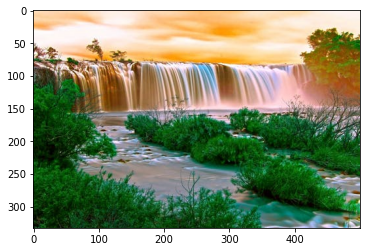

In [5]:
img = cv2.imread('Scene.jpeg')
plt.imshow(img)

In [6]:
# This is a 3-d array of pixel color info, in BGR format
print(img)
print("Image Properties")
print("- Number of Pixels: " + str(img.size))
print("- Shape/Dimensions: " + str(img.shape))

[[[255 227 200]
  [255 227 200]
  [255 227 200]
  ...
  [255 246 242]
  [255 246 242]
  [255 246 242]]

 [[255 226 197]
  [255 227 197]
  [255 226 197]
  ...
  [255 246 242]
  [255 246 242]
  [255 246 242]]

 [[255 224 193]
  [253 224 193]
  [255 224 193]
  ...
  [254 245 241]
  [254 245 241]
  [254 245 241]]

 ...

 [[  0   4   0]
  [  2  13   0]
  [ 11  32  10]
  ...
  [228 225 227]
  [255 254 255]
  [235 232 234]]

 [[  0   4   0]
  [  2  15   0]
  [ 29  60  33]
  ...
  [255 247 255]
  [242 235 242]
  [173 169 175]]

 [[  0   3   0]
  [  0   7   0]
  [ 15  50  23]
  ...
  [226 219 226]
  [189 187 187]
  [112 113 109]]]
Image Properties
- Number of Pixels: 499500
- Shape/Dimensions: (333, 500, 3)


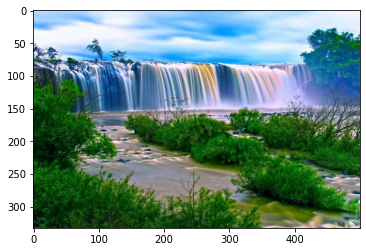

In [7]:
# convert image to RGB color for matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# show image with matplotlib
plt.imshow(img)

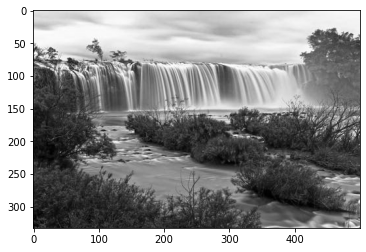

In [8]:
# convert image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# have to convert grayscale back to RGB for plt.imshow(), since plt.imshow expects a 3d array
# try plotting the same directly with gray_img and see the result for yourself 
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB))

In [9]:
# grayscale image represented as a 2-d array, no need of BGR colour channels
print(gray_img)

[[232 232 232 ... 248 248 248]
 [231 232 231 ... 248 248 248]
 [230 229 230 ... 247 247 247]
 ...
 [  2   8  23 ... 226 254 233]
 [  2   9  48 ... 250 238 171]
 [  2   4  36 ... 222 188 112]]


In [10]:
# finding  the average per row of img
# np.average() takes in an axis argument which finds the average across that axis.(axis=0)
average_color_per_row = np.average(img, axis=0)

# find average across average per row
average_color = np.average(average_color_per_row, axis=0)

# convert back to uint8
average_color = np.uint8(average_color)
print(average_color)

[ 91 129 119]


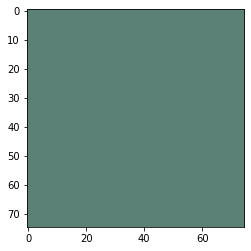

In [11]:
# create 75 x 75 pixel array with average color value
average_color_img = np.array([[average_color]*75]*75, np.uint8)

plt.imshow(average_color_img)

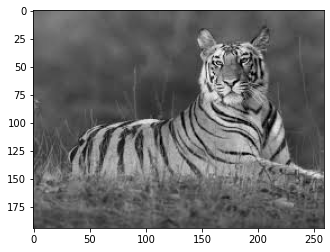

In [14]:
#Read Image in GrayScale by setting 0 in the arguments
img_gray = cv2.imread('122.jpg',0)
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB))

In [15]:
# assigning height and width from img_gray.shape
h,w = img_gray.shape[:2]
print(h, w)

194 259


In [16]:
grad_img = np.asarray(img_gray)
# 2-d array
print(grad_img)

[[110 110 110 ... 116 116 116]
 [110 110 110 ... 117 117 117]
 [111 111 111 ... 119 119 119]
 ...
 [ 67  69  73 ...  98  91  82]
 [ 65  58  58 ...  86  83  80]
 [ 65  58  58 ...  86  83  80]]


In [17]:
#applying gradient - subtracting the next pixel from the current pixel
for i in range(0,h):
  # traversing across height
  for j in range(0,w-1):
  # traversing across width
    min_pix_val = min(img_gray[i][j+1], img_gray[i][j])
    if min_pix_val == img_gray[i][j+1]:
      temp_arr = img_gray[i][j] - img_gray[i][j+1]
    else:
      temp_arr = img_gray[i][j+1] - img_gray[i][j]  
    grad_img[i,j] = temp_arr

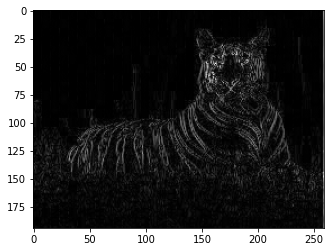

In [18]:
#we can use pillow package
from PIL import Image
gradient_img = Image.fromarray(grad_img)
# Cmap='gray' -> converts to gray scale directly
plt.imshow(gradient_img, cmap='gray')

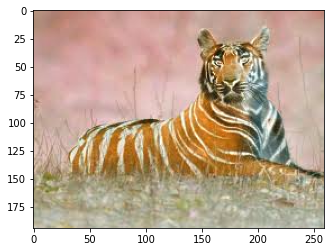

In [19]:
# Negatives
img = cv2.imread('122.jpg')
B,G,R = cv2.split(img)
B[:] = [255-x for x in B]     #inverting blue
G[:] = [255-x for x in G]     #inverting green    
R[:] = [255-x for x in R]     #inverting red

#saving image
neg_img = cv2.merge((B, G, R)) 
plt.imshow(neg_img)

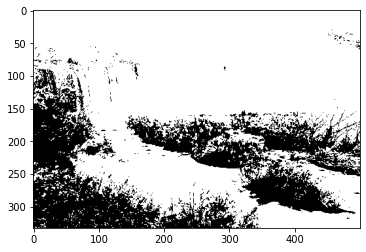

In [20]:
"""
Thresholding

Binary Thresholding: Let's say we wish to convert an image into 
a binary image i.e. assign a pixel either a value of 0 or 1. To do 
this, we can perform thresholding. For instance, if the Threshold (T) 
value is 60, then all pixels with values greater than 60 would be assigned 
a value of 1, and all pixels with values lesser than or equal to that would 
be assigned a value of 0."""

# threshold for grayscale image from the scenery pic
_, threshold_img = cv2.threshold(gray_img, 60, 255, cv2.THRESH_BINARY)

threshold_img = cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB)
# plt.figure(figsize=(10,10))
plt.imshow(threshold_img)

## Experiment with multiple numbers

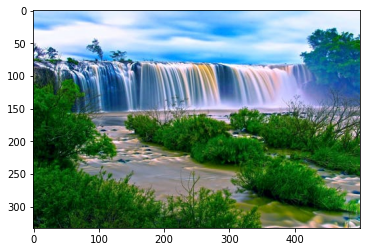

In [21]:
## Let's see how we can use this in noise removal

# let us set some threshold for hue channel in blue range
blue_min = np.array([85, 60, 60], np.uint8)
blue_max = np.array([150, 255, 255], np.uint8)

upstate = cv2.imread('Scene.jpeg')
# Hue, Saturation, and Value (HSV) is a color model that is often used in place of the RGB color model in graphics and paint programs. 
# In using this color model, a color is specified then white or black is added to easily make color adjustments. 
upstate_hsv = cv2.cvtColor(upstate, cv2.COLOR_BGR2HSV)

plt.imshow(cv2.cvtColor(upstate_hsv, cv2.COLOR_HSV2RGB))

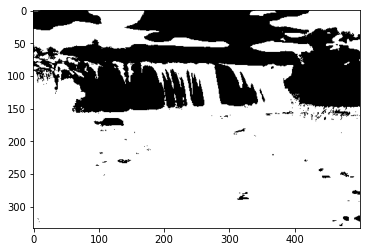

In [22]:
mask_inverse = cv2.inRange(upstate_hsv, blue_min, blue_max)
mask = cv2.bitwise_not(mask_inverse)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB))

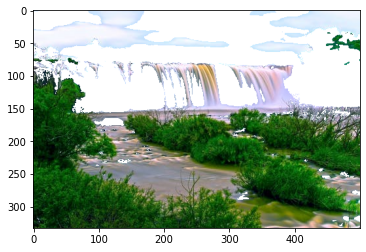

In [23]:
# convert single channel mask back into 3 channels
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

# perform bitwise and on mask to obtain cut-out image that is not blue
masked_upstate = cv2.bitwise_and(upstate, mask_rgb)

# replace the cut-out parts with white
masked_replace_white = cv2.addWeighted(masked_upstate, 1, \
                                       cv2.cvtColor(mask_inverse, cv2.COLOR_GRAY2RGB), 1, 0)

plt.imshow(cv2.cvtColor(masked_replace_white, cv2.COLOR_BGR2RGB))

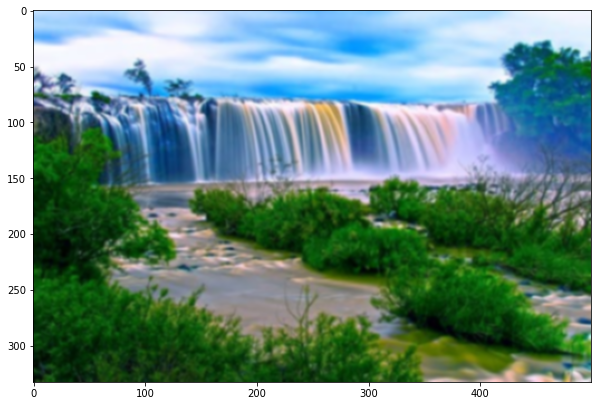

In [24]:
#Segmentation

#Gaussian Blur
# preproccess with blurring, with 5x5 kernel
img_blur_small = cv2.GaussianBlur(upstate, (5,5), 0)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_blur_small, cv2.COLOR_BGR2RGB))

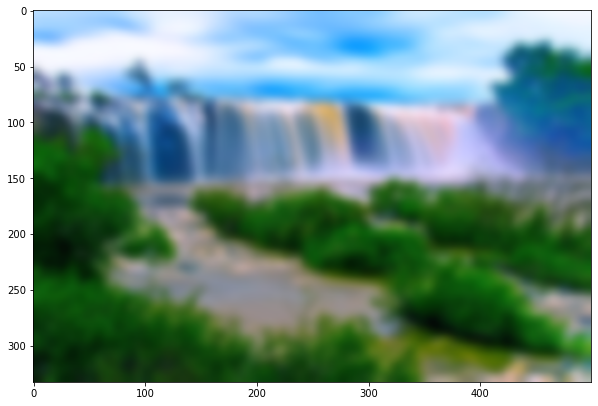

In [25]:
img_blur_small = cv2.GaussianBlur(upstate, (25,25), 0)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_blur_small, cv2.COLOR_BGR2RGB))

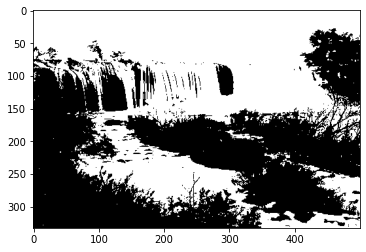

In [26]:
# threshold on regular image
gray_img = cv2.cvtColor(upstate, cv2.COLOR_BGR2GRAY)
_, threshold_img = cv2.threshold(gray_img, 100, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB))

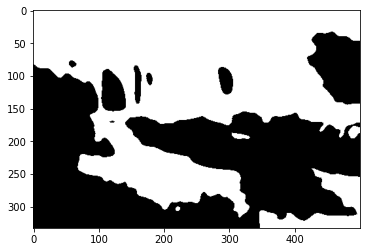

In [27]:
#threshold on blurred image
gray_blur_img = cv2.cvtColor(img_blur_small, cv2.COLOR_BGR2GRAY)
_, threshold_img_blur = cv2.threshold(gray_blur_img, 100, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(threshold_img_blur, cv2.COLOR_GRAY2RGB))

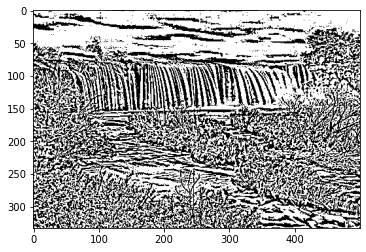

In [28]:
# using adaptive threshold instead of global
adaptive_thresh = cv2.adaptiveThreshold(gray_img,255,\
                                         cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                                         cv2.THRESH_BINARY,11,2)
plt.imshow(cv2.cvtColor(adaptive_thresh, cv2.COLOR_GRAY2RGB))

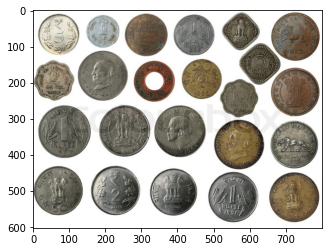

In [29]:
coins = cv2.imread('coins.jpg')
plt.imshow(cv2.cvtColor(coins, cv2.COLOR_BGR2RGB))

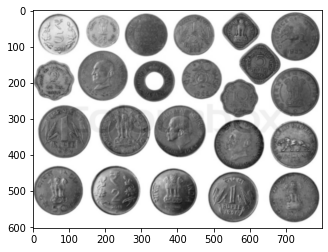

In [30]:
# get binary image and apply Gaussian blur
coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
coins_preprocessed = cv2.GaussianBlur(coins_gray, (5, 5), 0)
plt.imshow(cv2.cvtColor(coins_preprocessed, cv2.COLOR_GRAY2RGB))

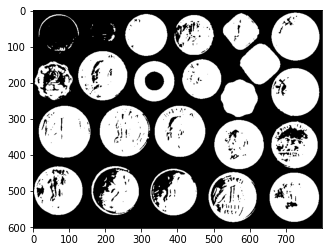

In [31]:
_, coins_binary = cv2.threshold(coins_preprocessed, 130, 255, cv2.THRESH_BINARY)

# invert image to get coins
coins_binary = cv2.bitwise_not(coins_binary)
plt.imshow(cv2.cvtColor(coins_binary, cv2.COLOR_GRAY2RGB))

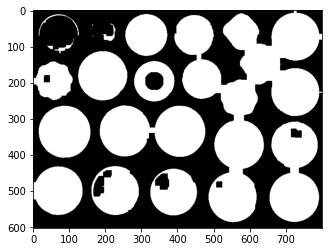

In [32]:
# Morphology -> Erosion
# morph coins by eroding and dilating to remove noise
morph_kernel = np.ones((15,15),np.uint8)
coins_morph = cv2.morphologyEx(coins_binary, cv2.MORPH_CLOSE, morph_kernel)

plt.imshow(cv2.cvtColor(coins_morph, cv2.COLOR_GRAY2RGB))

Number of coins:  24


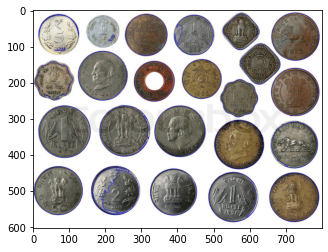

In [33]:
# find contours
coins_contours, _ = cv2.findContours(coins_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# make copy of image
coins_and_contours = np.copy(coins)

# find contours of large enough area
min_coin_area = 60
large_contours = [cnt for cnt in coins_contours if cv2.contourArea(cnt) > min_coin_area]

# draw contours
cv2.drawContours(coins_and_contours, large_contours, -1, (255,0,0))

plt.imshow(cv2.cvtColor(coins_and_contours, cv2.COLOR_BGR2RGB))

# print number of contours
print('Number of coins: ', len(large_contours))

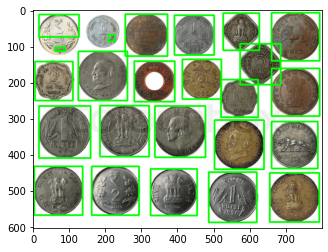

In [34]:
# create copy of image to draw bounding boxes
bounding_img = np.copy(coins)

# for each contour find bounding box and draw rectangle
for contour in large_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(bounding_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

plt.imshow(cv2.cvtColor(bounding_img, cv2.COLOR_BGR2RGB))

In [35]:
#Histogram - Equalization
#Read Image in GrayScale by setting 0 in the arguments
img_gray = cv2.imread('122.jpg',0)
height,width = img_gray.shape[:2]        
N = height * width

In [36]:
#Initialize intensity values with 256 zeroes
intensity_count = [0] * 256   
high_contrast = np.zeros(img_gray.shape)

In [37]:
#Find pixels count for each intensity
for i in range(0,height):
  for j in range(0,width):
    intensity_count[img_gray[i][j]] += 1

In [38]:
L = 256
intensity_count,total_values_used = np.histogram(img.flatten(),L,[0,L])      
# Calculating Probability density function -> based on frequency/count
pdf_list = np.ceil(intensity_count*(L-1)/img.size)
# Calculating Cumulative distribution function 
cdf_list = pdf_list.cumsum()

In [39]:
#Apply the new intensities in our new image
for y in range(0, height):
  for x in range(0, width): 
    high_contrast[y,x] = cdf_list[img_gray[y,x]]

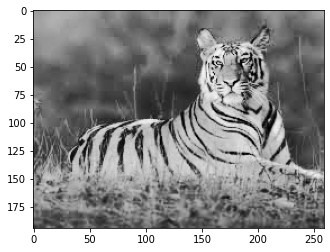

In [40]:
# this is much sharper image
plt.imshow(high_contrast, cmap='gray')

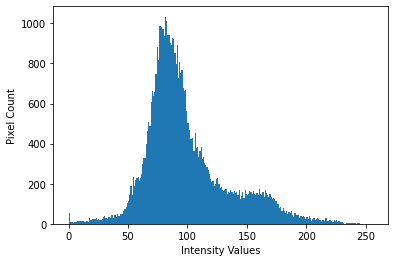

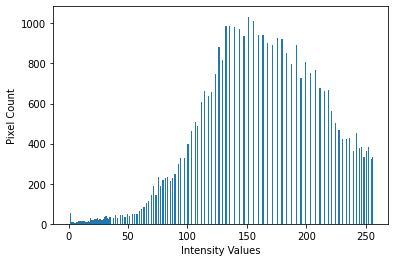

In [41]:
plt.hist(img_gray.ravel(),256,[0,256])
plt.xlabel('Intensity Values')
plt.ylabel('Pixel Count')
plt.show()

plt.hist(high_contrast.ravel(),256,[0,256])	
plt.xlabel('Intensity Values')
plt.ylabel('Pixel Count')
plt.show()

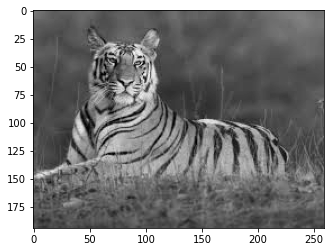

In [42]:
# Horizontal flip

flip_img = cv2.flip(img_gray, 1)
plt.imshow(flip_img, cmap='gray')

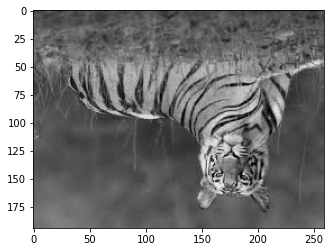

In [43]:
# Vertical
flip_img = cv2.flip(img_gray, 0)
plt.imshow(flip_img, cmap='gray')

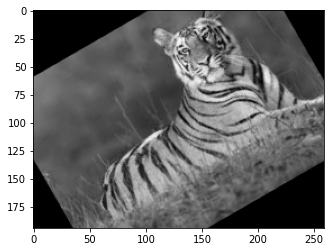

In [44]:
h, w = img_gray.shape
M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), 30, 1)
rotated_img = cv2.warpAffine(img_gray, M, (w, h))
plt.imshow(rotated_img, cmap='gray')

In [45]:
"""
Image Comparison

In images we generally use major metrics while comparing the similarity like:

MSE -> Mean Squared Error

SSIM -> Structural Similarity Index

SSIM attempts to model the perceived change in the structural information of the image,
 whereas MSE is actually estimating the perceived errors. There is a subtle 
 difference between the two, but the results are dramatic. Unlike MSE, the SSIM 
 value can vary between -1 and 1, where 1 indicates perfect similarity.

Pattern Intensity -> Squared differences between intensity values transformed by a function
 of type 1 \(1 + x)  and summed them up

Mutual Information"""

def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

In [46]:
mse(rotated_img, img_gray)

3443.4657286152133

In [47]:
mse(flip_img, img_gray)

2355.1307566771484

In [48]:
from skimage import measure
print(measure.compare_ssim(rotated_img, img_gray))
print(measure.compare_ssim(flip_img, img_gray))

0.20217133214056204
0.19343700785214413


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
"""
These are some of the basic image processing operations that are shown.
 Most of the other operations are derived from these operations itself

Do explore others like filters, skeletonization, smoothing, image cuts, 
and other image augmentations like zooming, brightness, contrast."""